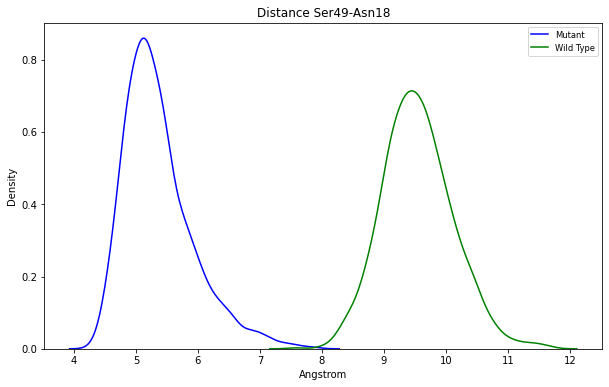

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Function to read .agr file and extract data from frame 1500 onwards
def read_agr_file(filename, start_frame=1500, end_frame=2600):
    frames = []
    values = []
    with open(filename, 'r') as file:
        for line in file:
            if line.startswith('@type xy'):
                break
        for line in file:
            if line.startswith('@'):
                continue
            parts = line.split()
            if len(parts) == 2:
                frame = int(float(parts[0]))
                value = float(parts[1])
                if frame >= start_frame and (end_frame is None or frame <= end_frame):
                    frames.append(frame)
                    values.append(value)
    return values

# List of colors for the KDE plots
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Plot multiple KDEs
def plot_kdes(filenames, legend_names):
    plt.figure(figsize=(10, 6))  # Set the figure size
    for idx, filename in enumerate(filenames):
        values = read_agr_file(filename)
        sns.kdeplot(values, color=colors[idx % len(colors)], label=legend_names[idx])

    # Add labels and title
    plt.xlabel('Angstrom')
    plt.ylabel('Density')
    plt.title('Distance Ser49-Asn18')
    

    # Add legend
    plt.legend(loc='upper right', fontsize='small')
    
    plt.savefig("ser49_asn18.png", dpi=1200)

    # Display plot
    plt.show()

# List of specific .agr files to read
filenames = ['mut_distance_ser49_asn18.agr', 'WT_distance_ser49_asn18.agr']

# Custom legend names
legend_names = ['Mutant', 'Wild Type']

# Plot KDEs for the given files with custom legend names
plot_kdes(filenames, legend_names)

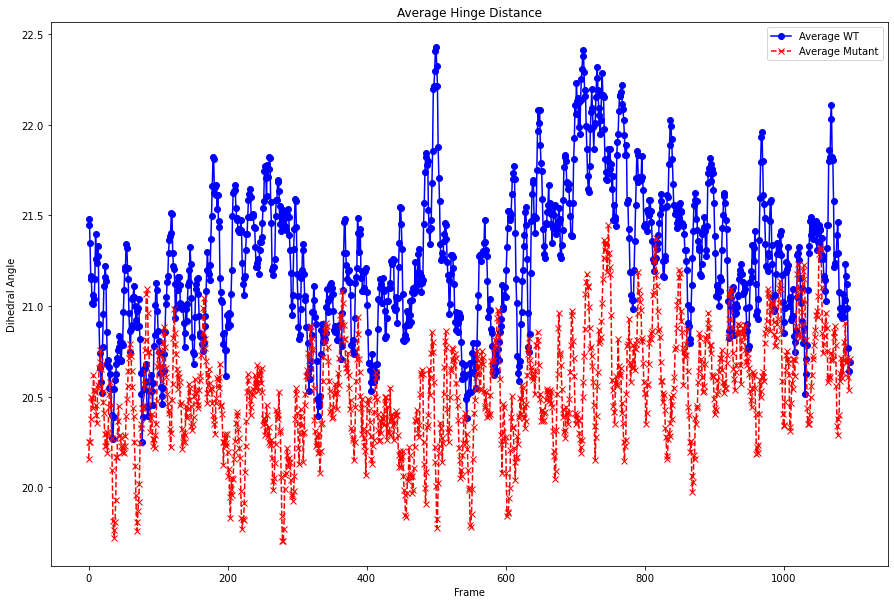

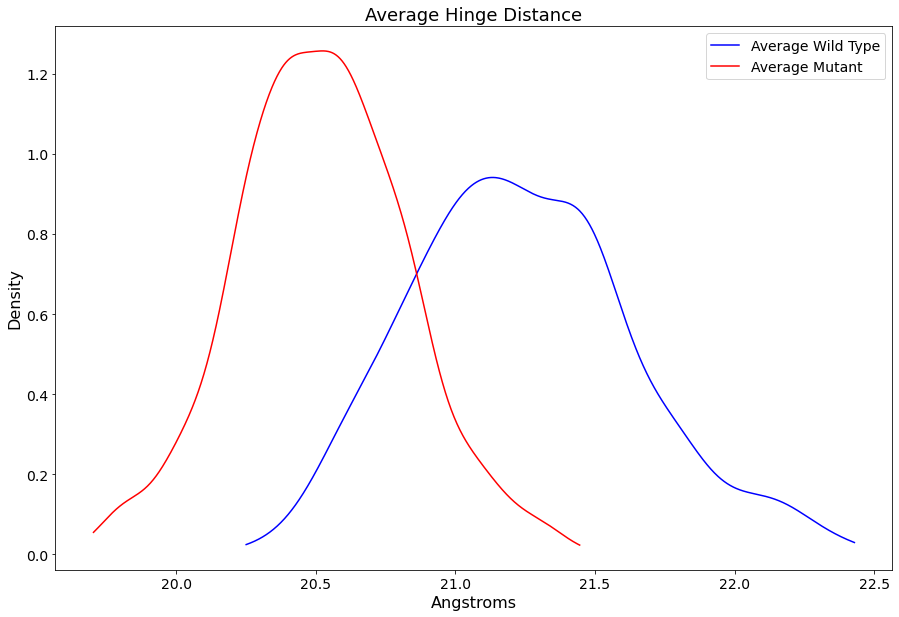

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Function to read .agr file and extract data
def read_agr_file(filename):
    frames = []
    values = []
    with open(filename, 'r') as file:
        for line in file:
            if line.startswith('@type xy'):
                break
        for line in file:
            if line.startswith('@'):
                continue
            parts = line.split()
            if len(parts) == 2:
                frames.append(float(parts[0]))
                values.append(float(parts[1]))
    return values

# Smoothing function
def smooth(data, window_size=5):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# List of WT and mut .agr files to read (update with your filenames)
wt_filenames = [
    'dist_3ql3_24-53.agr', 
    'dist_3ql3_22-53.agr', 
    'dist-3ql3_N23-P53_CA.agr'
]

mut_filenames = [
    'dist_3ql0_25-54.agr', 
    'dist_3ql0_22-54.agr', 
    'dist-3ql0_P23-P54_CA.agr'
]

# Read the data from the .agr files
wt_datasets = [read_agr_file(filename) for filename in wt_filenames]
mut_datasets = [read_agr_file(filename) for filename in mut_filenames]

# Exclude the first 1500 frames and apply smoothing to each dataset
smoothed_wt_datasets = [smooth(data[1500:2600]) for data in wt_datasets]
smoothed_mut_datasets = [smooth(data[1500:2600]) for data in mut_datasets]

# Ensure all datasets have the same length after smoothing
min_length_wt = min(len(data) for data in smoothed_wt_datasets)
min_length_mut = min(len(data) for data in smoothed_mut_datasets)
smoothed_wt_datasets = [data[:min_length_wt] for data in smoothed_wt_datasets]
smoothed_mut_datasets = [data[:min_length_mut] for data in smoothed_mut_datasets]

# Average the datasets frame-by-frame
avg_wt_data = np.mean(smoothed_wt_datasets, axis=0)
avg_mut_data = np.mean(smoothed_mut_datasets, axis=0)

# Plot the averaged WT and mutant data trendlines
plt.figure(figsize=(15, 10))
plt.plot(avg_wt_data, marker='o', linestyle='-', color='blue', label='Average WT')
plt.plot(avg_mut_data, marker='x', linestyle='--', color='red', label='Average Mutant')

# Add labels and title
plt.xlabel('Frame')
plt.ylabel('Dihedral Angle')
plt.title('Average Hinge Distance')
plt.legend(loc='upper right')
plt.savefig("average_hinge.png", dpi=1200)
plt.show()

# Compute histograms and smooth them using Gaussian KDE
def plot_smoothed_histogram(data, color, label):
    density = gaussian_kde(data)
    xs = np.linspace(min(data), max(data), 1000)
    density.covariance_factor = lambda: .25  # Smoothing parameter
    density._compute_covariance()
    plt.plot(xs, density(xs), color=color, label=label)

# Plot histograms with smoothed curves
plt.figure(figsize=(15, 10))
plot_smoothed_histogram(avg_wt_data, color='blue', label='Average Wild Type')
plot_smoothed_histogram(avg_mut_data, color='red', label='Average Mutant')

# Add labels and title
plt.xlabel('Angstroms', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.title('Average Hinge Distance', fontsize=18)
plt.legend(loc='upper right', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig("smoothed_average_hinge.png", dpi=1200)
plt.show()


1101
1101


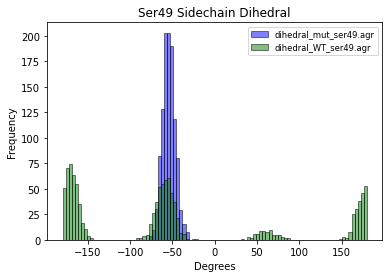

In [3]:
import matplotlib.pyplot as plt
import numpy as numpy

# Function to read .agr file and extract data from frame 1500 onwards
def read_agr_file(filename, start_frame=1500, end_frame=2600):
    frames = []
    values = []
    start_reading = False
    with open(filename, 'r') as file:
        for line in file:
            if line.startswith('@type xy'):
                break
        for line in file:
            if line.startswith('@'):
                continue
            parts = line.split()
            if len(parts) == 2:
                frame = int(float(parts[0]))
                value = float(parts[1])
                if frame >= start_frame and (end_frame is None or frame <= end_frame):
                    frames.append(frame)
                    values.append(value)
    return values


# List of colors for the histograms
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Plot multiple histograms
def plot_histograms(filenames):
    num_bins = numpy.linspace(-180,180,100)  # Adjust this number as needed
    for idx, filename in enumerate(filenames):
        values = read_agr_file(filename)
        plt.hist(values, bins=num_bins, edgecolor='black', color=colors[idx % len(colors)], alpha=0.5, label=filename)

    # Add labels and title
    plt.xlabel('Degrees')
    plt.ylabel('Frequency')
    plt.title('Ser49 Sidechain Dihedral')

    # Add legend
    plt.legend(loc='upper right', fontsize='small')
    
    plt.savefig("Ser49_dihedral.png", dpi=1200)
    
    # Display plot
    plt.show()
    

# List of specific .agr files to read
filenames = ['dihedral_mut_ser49.agr', 'dihedral_WT_ser49.agr']  # Add your specific filenames here

# Plot histograms for the given files
plot_histograms(filenames)

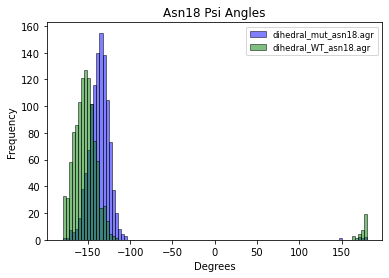

In [4]:
import matplotlib.pyplot as plt
import numpy as numpy

# Function to read .agr file and extract data from frame 1500 onwards
def read_agr_file(filename, start_frame=1500, end_frame=2600):
    frames = []
    values = []
    start_reading = False
    with open(filename, 'r') as file:
        for line in file:
            if line.startswith('@type xy'):
                break
        for line in file:
            if line.startswith('@'):
                continue
            parts = line.split()
            if len(parts) == 2:
                frame = int(float(parts[0]))
                value = float(parts[1])
                if frame >= start_frame and (end_frame is None or frame <= end_frame):
                    frames.append(frame)
                    values.append(value)
    return values

# List of colors for the histograms
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Plot multiple histograms
def plot_histograms(filenames):
    num_bins = numpy.linspace(-180,180,100)  # Adjust this number as needed
    for idx, filename in enumerate(filenames):
        values = read_agr_file(filename)
        plt.hist(values, bins=num_bins, edgecolor='black', color=colors[idx % len(colors)], alpha=0.5, label=filename)

    # Add labels and title
    plt.xlabel('Degrees')
    plt.ylabel('Frequency')
    plt.title('Asn18 Psi Angles')

    # Add legend
    plt.legend(loc='upper right', fontsize='small')
    
    plt.savefig("Asn18_dihedral.png", dpi=1200)

    # Display plot
    plt.show()

# List of specific .agr files to read
filenames = ['dihedral_mut_asn18.agr', 'dihedral_WT_asn18.agr']  # Add your specific filenames here

# Plot histograms for the given files
plot_histograms(filenames)